**=========================About Project=================================**

**Project Name:** Loan Eligibility Prediction Using Logistics Regression Algorithm

**Framework:** CRISP-DM

**Literature Review:** ```https://www.researchgate.net/publication/369143834_Loan_Eligibility_Prediction_Using_Logistics_Regression_Algorithm```

**Dataset:** ```https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset```

**===================================================================**


**1. Introduction**

**2. Business Understanding**
A. Problem Statements

B. Goals

C. Solution Specifications

**3. Data Understanding**

A. The Features:

- ``Loan_ID`` : loan ID, unique code / number 
- ``Gender``: Sex, Male/Female 
- ``Married``: married status of the applicant, (Y/N) 
- ``Dependents`` : Amount of dependents, number 
- ``Education``: The last education of the applicant, 
(Graduate/Under Graduate) 
- ``Self_Employed`` : Is the applicant self-employed, 
(Y/N) 
- ``ApplicantIncome`` : Applicant income, number 
- ``CoapplicantIncome`` : Wife's income, number 
- ``LoanAmount`` : Loan amount, number in thousands 
- ``Loan_Amount_Term`` : Loan term, number in months 
- ``Credit_History`` : Loan history, yes or no (1/0) 
- ``Property_Area`` : Property area, Urban/ Semi-Urban/ 
Rural 
- ``Loan_Status`` : Loan approval status, (Y/N) 

**Import Necessary Libraries**

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

B. Data Exploration

In [352]:
df_train = pd.read_csv('loan-train.csv')

In [353]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [354]:
# summary statistic
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [355]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [356]:
df_train.shape

(614, 13)

In [357]:
print(df_train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [358]:
# drop all rows that contain missing value in Credit_History column
df_train = df_train.dropna(subset=['Credit_History'])
print(df_train.isnull().sum())

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [359]:
# Fill categorical with mode
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode()[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].mode()[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])

# Fill numerical with mean (assign back)
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean())

In [360]:
# drop Loan_ID as it is not useful for prediction
df_train = df_train.drop(columns=['Loan_ID'])

In [361]:
# Encode the target variable (Loan_Status: Y -> 1, N -> 0)
# This is needed for the model to work with binary classification
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})
print("Loan_Status encoded: Y=1, N=0")
print(df_train['Loan_Status'].value_counts())

Loan_Status encoded: Y=1, N=0
Loan_Status
1    385
0    179
Name: count, dtype: int64


**4. Data Preparation - Define Preprocessing Pipeline**

We'll create a pipeline that automatically handles:
- Categorical encoding (OneHotEncoder for categorical features)
- Numerical scaling (StandardScaler for numerical features)

This way, during deployment, you just pass raw data and the pipeline handles everything!

In [362]:
# Define categorical and numerical columns
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

print("Preprocessing pipeline created!")
print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Preprocessing pipeline created!
Categorical features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Numerical features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [363]:
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

**L-BFGS optimization algorithm**

In [364]:
# Create complete pipeline with preprocessing + model
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))
])

# Train the model (now it handles raw categorical data!)
pipe.fit(X_train, y_train)

# Score on training
print("Training Score:", pipe.score(X_train, y_train))

# Score on validation
print("Validation Score:", pipe.score(X_val, y_val))

Training Score: 0.8045685279187818
Validation Score: 0.8529411764705882
Validation Score: 0.8529411764705882


In [365]:
y_pred = pipe.predict(X_val)
y_pred_prob = pipe.predict_proba(X_val)[:, 1]  # For AUC

In [366]:
train_mse = mean_squared_error(y_train, pipe.predict(X_train))
test_mse = mean_squared_error(y_val, y_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.19543147208121828
Test MSE: 0.14705882352941177


Confusion Matrix:
 [[ 30  24]
 [  1 115]]


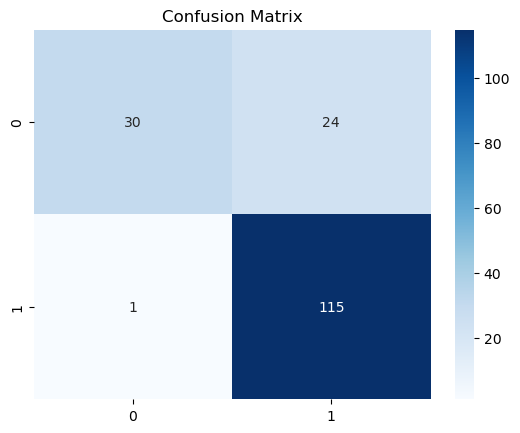

In [367]:
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)
# Visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [368]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
sensitivity = recall_score(y_val, y_pred)  # Sensitivity = Recall
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)

Accuracy: 0.8529411764705882
Precision: 0.8273381294964028
Sensitivity: 0.9913793103448276
 0.8529411764705882
Precision: 0.8273381294964028
Sensitivity: 0.9913793103448276


AUC: 0.8240740740740741


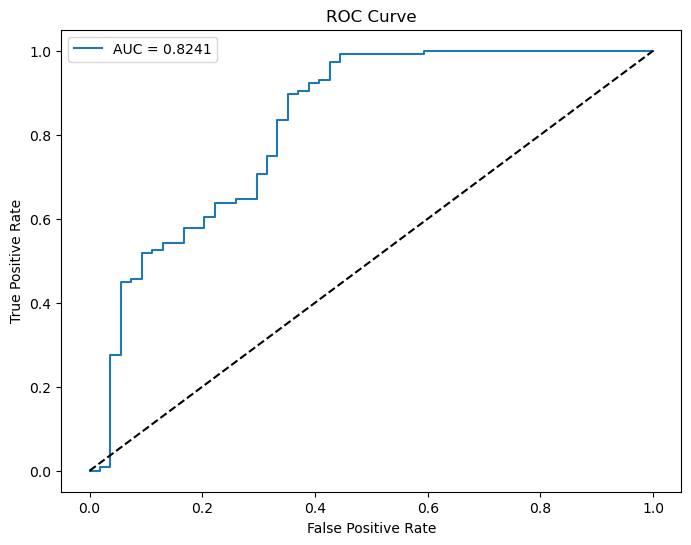

In [369]:
auc = roc_auc_score(y_val, y_pred_prob)
print("AUC:", auc)

# ROC Curve (as in Fig. 25)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [370]:
df_test = pd.read_csv('loan-test.csv')
# Repeat Step 3 preprocessing on df_test (no Loan_Status)
df_test = df_test.drop('Loan_ID', axis=1)  # After preprocessing
# Fill categorical with mode
df_test = df_test.dropna(subset=['Credit_History'])
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].mode()[0])
df_test['Married'] = df_test['Married'].fillna(df_test['Married'].mode()[0])
df_test['Dependents'] = df_test['Dependents'].fillna(df_test['Dependents'].mode()[0])
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0])

# Fill numerical with mean (assign back)
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean())


In [371]:
print(df_test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [372]:
# No need to encode manually anymore! 
# The pipeline handles everything automatically
predictions = pipe.predict(df_test)
predictions_proba = pipe.predict_proba(df_test)

# Convert predictions back to Y/N for readability
predictions_labels = ['Y' if pred == 1 else 'N' for pred in predictions]
print("Predictions (first 10):", predictions_labels[:10])
print("\nPrediction probabilities (first 5):")
print(predictions_proba[:5])

Predictions (first 10): ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y']

Prediction probabilities (first 5):
[[0.16649391 0.83350609]
 [0.25150747 0.74849253]
 [0.17657181 0.82342819]
 [0.4112234  0.5887766 ]
 [0.26790227 0.73209773]]


In [373]:
import joblib

# Save the complete pipeline (preprocessing + model)
# Now when you load this model, it can accept raw categorical data!
joblib.dump(pipe, 'loan_eligibility_model.pkl')
print("✅ Model saved successfully!")
print("\n🎉 Key benefit: This pipeline accepts raw data with categorical values")
print("   No need to manually encode during deployment!")

✅ Model saved successfully!

🎉 Key benefit: This pipeline accepts raw data with categorical values
   No need to manually encode during deployment!


**Example: How to use the saved model in deployment**

When you deploy this model, you can now pass raw data directly:

In [374]:
# # Example of deployment usage (demonstration only)
# # Load the model
# loaded_pipe = joblib.load('loan_eligibility_model.pkl')

# # User input with RAW categorical values (no encoding needed!)
# user_input = pd.DataFrame({
#     'Gender': ['Male'],
#     'Married': ['Yes'],
#     'Dependents': ['2'],
#     'Education': ['Graduate'],
#     'Self_Employed': ['No'],
#     'ApplicantIncome': [5000],
#     'CoapplicantIncome': [1500],
#     'LoanAmount': [150],
#     'Loan_Amount_Term': [360],
#     'Credit_History': [1.0],
#     'Property_Area': ['Urban']
# })

# # Make prediction directly (pipeline handles all preprocessing!)
# prediction = loaded_pipe.predict(user_input)
# prediction_proba = loaded_pipe.predict_proba(user_input)

# print("User Input:")
# print(user_input)
# print("\nPrediction:", "Approved ✅" if prediction[0] == 1 else "Denied ❌")
# print(f"Approval Probability: {prediction_proba[0][1]:.2%}")